# **중고차 가격 예측**  ─  6조 가격보이조
# 중고차 거래 데이터를 이용하여 머신러닝을 통해 중고차 가격 예측



---



---

# **Ⅰ. 데이터 셋**
### 보배드림 국산차 목록
- 차량 모델, 연식, 유형, 주행거리, 가격, 보험이력, 성능기록, 차량 등록증 데이터 수집
>https://www.bobaedream.co.kr/mycar/mycar_list.php?gubun=K&page=1


In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from pandas import Series, DataFrame
import pandas as pd
import sys
import requests
import numpy as np
import csv

In [ ]:
# 보배드림 국산차 웹사이트 크롤링
titles=[]
years=[]
fuels=[]
kms=[]
prices=[]
insurances=[]
performances=[]
registrations=[]

for i in range(150):
    base_url = "https://www.bobaedream.co.kr/mycar/mycar_list.php?gubun=K&page="
    start_no = 1
    url = base_url + str(start_no+i)+'&order=S11&view_size=20'
    
    response = requests.get(url)
    if response.status_code == 200: # 정상
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
    
    
    for i in range(20):
        pos_title = "#listCont > div.wrap-thumb-list > ul > li:nth-child(" +str(i+1)+ ") > div > div.mode-cell.title > p > a"
        divs_title = soup.select(pos_title)
        titles.append(divs_title[0].text)

        pos_year = "#listCont > div.wrap-thumb-list > ul > li:nth-child(" +str(i+1)+ ") > div > div.mode-cell.year"
        divs_year = soup.select(pos_year)
        years.append(divs_year[0].text.strip())

        pos_fuel = "#listCont > div.wrap-thumb-list > ul > li:nth-child(" +str(i+1)+ ") > div > div.mode-cell.fuel > span"
        divs_fuel = soup.select(pos_fuel)
        fuels.append(divs_fuel[0].text)

        pos_km = "#listCont > div.wrap-thumb-list > ul > li:nth-child(" +str(i+1)+ ") > div > div.mode-cell.km > span"
        divs_km = soup.select(pos_km)
        kms.append(divs_km[0].text)

        pos_price = "#listCont > div.wrap-thumb-list > ul > li:nth-child(" +str(i+1)+ ") > div > div.mode-cell.price > b"
        divs_price = soup.select(pos_price)
        prices.append(divs_price[0].text)
        
        pos_insurance = "#listCont > div.wrap-thumb-list > ul > li:nth-child(" +str(i+1)+ ") > div > div.mode-cell.title > dl.data.is-list > dd.data-item"
        divs_insurance = soup.select(pos_insurance)
        try:
            if len(divs_insurance)>=2:
                if divs_insurance[-1].text == '보험이력':
                    insurances.append(divs_insurance[-1].text)
                elif divs_insurance[-2].text == '보험이력':
                    insurances.append(divs_insurance[-2].text)
                else:
                    insurances.append(0)
            elif len(divs_insurance)<2:
                if divs_insurance[-1].text == '보험이력':
                    insurances.append(divs_insurance[-1].text)
                else:
                    insurances.append(0)
        except:
            pass
        
        pos_performance = "#listCont > div.wrap-thumb-list > ul > li:nth-child(" +str(i+1)+ ") > div > div.mode-cell.title > dl.data.is-list > dd.data-item"
        divs_performance = soup.select(pos_performance)
        try:
            if len(divs_performance)>=3:
                if divs_performance[-1].text == '성능기록':
                    performances.append(divs_performance[-1].text)
                elif divs_performance[-2].text == '성능기록':
                    performances.append(divs_performance[-2].text) 
                elif divs_performance[-3].text == '성능기록':
                    performances.append(divs_performance[-3].text) 
                else:
                    performances.append(0)
            elif len(divs_performance)==2:
                if divs_performance[-1].text == '성능기록':
                    performances.append(divs_performance[-1].text)
                elif divs_performance[-2].text == '성능기록':
                    performances.append(divs_performance[-2].text) 
                else:
                    performances.append(0)
            elif len(divs_performance)<2:
                if divs_performance[-1].text == '성능기록':
                    performances.append(divs_performance[-1].text)
                else:
                    performances.append(0)
        except:
            pass
        
        pos_registration = "#listCont > div.wrap-thumb-list > ul > li:nth-child(" +str(i+1)+ ") > div > div.mode-cell.title > dl.data.is-list > dd.data-item"
        divs_registration = soup.select(pos_registration)
        try:
            if divs_registration[-1].text == '등록증':
                registrations.append(divs_registration[-1].text)
            else:
                registrations.append(0)
        except:
            pass
        
print('<차량 모델명>')
print(titles)
print('<차량 연식>')
print(years)
print('<차량 유형>')
print(fuels)
print('<차량 주행거리>')
print(kms)
print('<차량 가격>')
print(prices)
print('<차량 보험이력>')
print(insurances)
print('<차량 성능기록>')
print(performances)
print('<차량 등록증>')
print(registrations)


print(len(titles))

print(len(years))

print(len(fuels))

print(len(kms))

print(len(prices))

print(len(insurances))

print(len(performances))

print(len(registrations))

<차량 모델명>
['현대 더 뉴 제네시스 쿠페 200 터보 S', '현대 아반떼AD 1.6 T-GDi 스포츠 M/T', '기아 올 뉴 카니발 2.2 디젤 11인승 럭셔리', '기아 더 뉴 스포티지R 2.0 디젤 2WD 프레스티지', '기아 더 뉴 K3 1.6 VGT 프레스티지 스페셜', '기아 스포티지 4세대 2.0 디젤 2WD 노블레스', '기아 오피러스 프리미엄 3.3 GH330 프리미엄', '현대 그랜저HG 240 모던 컬렉션', '쌍용 슈퍼 렉스턴 2.0 디젤 2WD RX4 최고급형', 'GM대우 기타 기타 ', '기아 봉고3 15인승 ', '기아 봉고3 15인승', '현대 카운티 캠핑카', 'GM대우 기타 기타', '현대 뉴스타렉스 캠핑카', 'GM대우 BH 090', '현대 뉴스타렉스 점보 2.5 디젤 TCi 12인승 2WD GRX 멀티 고급형', '현대 e-카운티 장축 25인승 자가용 슈퍼', '현대 카운티 캠핑카', '현대 에어로타운 롱바디  캠핑카', '기아 코스모스 35인승', '현대 캠핑카 캠핑카', '현대 카운티 캠핑카', '현대 뉴스타렉스 캠핑카', '기아 프레지오 3.0 디젤 그랜드 코치 15인승 초장축 LS', '현대 e-카운티 장축 25인승 자가용 슈퍼', '현대 그랜저HG 300 익스클루시브', '기아 더 뉴 모하비 3.0 디젤 AWD 프레지던트', '쌍용 렉스턴 스포츠 2.2 디젤 4WD 프레스티지', '현대 아반떼AD 1.6 프리미엄', '쉐보레 크루즈 1.8 LTZ 플러스', '현대 뉴 에쿠스 3.8 VS 380 럭셔리', '쌍용 렉스턴 스포츠 2.2 디젤 4WD 프레스티지', '현대 그랜드스타렉스 2.5 디젤 왜건 12인승 2WD  스마트', '현대 더 뉴 싼타페  2.5 가솔린 터보 4WD 캘리그래피 5인승', '현대 쏘나타 하이브리드 2.0 HEV 인스퍼레이션', '현대 포터2 CRDi 슈퍼캡 초장축 골드 최고급형', '기아 스포티지 4세대 2.0 디젤 2WD  프레스티지', '기아 올 뉴 K3 G1.6 노블레스', '

In [ ]:
# 연도에서 앞에 20 제외
years2=[]
for i in range(len(years)):
    years2.append(years[i][slice(2)])
print(years2)

['12', '17', '14', '14', '16', '16', '10', '16', '11', '10', '04', '05', '02', '06', '05', '05', '05', '07', '01', '97', '00', '97', '03', '06', '01', '07', '13', '17', '19', '15', '13', '10', '21', '16', '21', '19', '20', '18', '18', '10', '15', '21', '17', '17', '14', '13', '18', '16', '19', '11', '17', '10', '18', '20', '13', '15', '18', '12', '15', '21', '18', '12', '15', '21', '16', '21', '15', '14', '18', '15', '19', '18', '18', '18', '15', '15', '17', '16', '16', '11', '18', '15', '15', '17', '16', '16', '11', '15', '16', '12', '17', '13', '14', '18', '16', '12', '13', '19', '17', '14', '12', '16', '11', '13', '21', '14', '13', '14', '13', '18', '17', '17', '18', '18', '17', '17', '17', '17', '11', '14', '18', '13', '13', '18', '21', '21', '14', '19', '16', '14', '16', '12', '13', '17', '18', '17', '15', '09', '07', '12', '09', '16', '16', '08', '19', '11', '09', '07', '09', '19', '13', '12', '11', '10', '05', '13', '08', '11', '11', '07', '12', '08', '09', '12', '10', '11', '09

In [ ]:
# 데이터타입 변경
years = list(map(int,years2))
print(years)

[12, 17, 14, 14, 16, 16, 10, 16, 11, 10, 4, 5, 2, 6, 5, 5, 5, 7, 1, 97, 0, 97, 3, 6, 1, 7, 13, 17, 19, 15, 13, 10, 21, 16, 21, 19, 20, 18, 18, 10, 15, 21, 17, 17, 14, 13, 18, 16, 19, 11, 17, 10, 18, 20, 13, 15, 18, 12, 15, 21, 18, 12, 15, 21, 16, 21, 15, 14, 18, 15, 19, 18, 18, 18, 15, 15, 17, 16, 16, 11, 18, 15, 15, 17, 16, 16, 11, 15, 16, 12, 17, 13, 14, 18, 16, 12, 13, 19, 17, 14, 12, 16, 11, 13, 21, 14, 13, 14, 13, 18, 17, 17, 18, 18, 17, 17, 17, 17, 11, 14, 18, 13, 13, 18, 21, 21, 14, 19, 16, 14, 16, 12, 13, 17, 18, 17, 15, 9, 7, 12, 9, 16, 16, 8, 19, 11, 9, 7, 9, 19, 13, 12, 11, 10, 5, 13, 8, 11, 11, 7, 12, 8, 9, 12, 10, 11, 9, 21, 11, 19, 12, 6, 8, 7, 12, 8, 10, 10, 10, 13, 11, 8, 14, 11, 12, 11, 8, 11, 11, 12, 12, 9, 6, 19, 12, 10, 10, 11, 12, 8, 10, 9, 7, 11, 12, 11, 6, 7, 12, 12, 9, 11, 17, 6, 13, 8, 10, 15, 19, 8, 11, 11, 14, 12, 10, 15, 12, 14, 10, 14, 15, 15, 15, 12, 11, 11, 18, 10, 12, 16, 15, 12, 17, 15, 11, 16, 11, 10, 16, 11, 10, 17, 9, 6, 8, 7, 6, 9, 7, 12, 11, 3, 19,

In [ ]:
# 크롤링 데이터 최종 확인
print(len(titles))

print(len(years))

print(len(fuels))

print(len(kms))

print(len(prices))

print(len(insurances))

print(len(performances))

print(len(registrations))

3000
3000
3000
3000
3000
3000
3000
3000


In [ ]:
# 데이터 프레임 변경
df = pd.DataFrame({'modelname':titles, 'year':years2, 'type':fuels, 
                  'km':kms, 'price':prices, 'insurance':insurances,
                  'performance':performances, 'registration':registrations})

In [ ]:
df

,modelname,year,type,km,price,insurance,performance,registration
0,현대 더 뉴 제네시스 쿠페 200 터보 S,2012,가솔린,13만km,900만원,0,0,0
1,현대 아반떼AD 1.6 T-GDi 스포츠 M/T,2017,가솔린,7만km,900만원,0,0,0
2,기아 올 뉴 카니발 2.2 디젤 11인승 럭셔리,2014,디젤,4만km,"1,690만원",0,0,0
3,기아 더 뉴 스포티지R 2.0 디젤 2WD 프레스티지,2014,디젤,13만km,990만원,0,0,0
4,기아 더 뉴 K3 1.6 VGT 프레스티지 스페셜,2016,디젤,14만km,950만원,0,0,0
...,...,...,...,...,...,...,...,...
2995,르노삼성 SM7 VQ23 LE,2006,가솔린,17만km,255만원,0,성능기록,0
2996,현대 뉴스타렉스 점보 밴 TCI 6인승 GRX 윈도우밴 고급형,2004,LPG,15만km,490만원,0,성능기록,0
2997,현대 뉴스타렉스 점보 CRDI 12인승 2WD GRX 최고급형,2007,디젤,15만km,499만원,0,0,0
2998,쉐보레 트랙스 1.4 가솔린 LT 레더 패키지,2015,가솔린,3만km,"1,090만원",0,성능기록,0


In [ ]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   modelname     3000 non-null   object
 1   year          3000 non-null   int64 
 2   type          3000 non-null   object
 3   km            3000 non-null   object
 4   price         3000 non-null   object
 5   insurance     3000 non-null   object
 6   performance   3000 non-null   object
 7   registration  3000 non-null   object
dtypes: int64(1), object(7)
memory usage: 187.6+ KB


In [ ]:
# NULL 값 확인
df.isnull().sum()

modelname       0
year            0
type            0
km              0
price           0
insurance       0
performance     0
registration    0
dtype: int64

In [ ]:
# 중복 값 확인
df.duplicated().sum()

54

In [ ]:
# 중복 값 확인
df.loc[df.duplicated(),:]

,modelname,year,type,km,price,insurance,performance,registration
60,현대 코나 1.6 디젤 2WD 플럭스 모던,2018,디젤,8만km,"1,499만원",보험이력,성능기록,0
61,기아 뉴 쏘렌토R 2.0 디젤 2WD TLX,2012,디젤,15만km,960만원,보험이력,성능기록,0
62,현대 싼타페 더 프라임 2.0 디젤 2WD 프리미엄,2015,디젤,14만km,"1,450만원",보험이력,성능기록,0
63,기아 셀토스 1.6 터보 2WD 시그니처,2021,가솔린,1만km,"2,170만원",보험이력,성능기록,0
80,기아 올 뉴 K7 하이브리드 2.4 HEV 프레스티지,2018,가솔린+전기,11만km,"1,950만원",보험이력,성능기록,0
81,기아 더 뉴 모닝 1.0 럭셔리,2015,가솔린,5만km,690만원,보험이력,성능기록,0
82,기아 더 뉴 K9 3.3 이그제큐티브,2015,가솔린,18만km,"1,550만원",보험이력,성능기록,0
83,기아 더 뉴 쏘렌토 2.0 디젤 2WD 프레스티지,2017,디젤,7만km,"2,040만원",보험이력,성능기록,0
84,현대 올 뉴 투싼 2.0 디젤 2WD 모던,2016,디젤,8만km,"1,599만원",보험이력,성능기록,0
85,기아 올 뉴 쏘렌토 2.0 디젤 2WD 노블레스,2016,디젤,5만km,"1,800만원",보험이력,성능기록,0


In [ ]:
# 주행거리(km)에서 단위가 다른 값 확인
df[df['km'].str.contains('ml')]

,modelname,year,type,km,price,insurance,performance,registration
1621,현대 제네시스 BH380,2013,가솔린,5만ml,"1,059만원",보험이력,성능기록,0
2275,기아 뉴 오피러스 3.5 아만티,2007,가솔린,13만ml,400만원,보험이력,0,0


# **II. 데이터 전처리**

- 주행거리가 '미등록'인 것 1개

In [ ]:
df[df['km']=='미등록']

,modelname,year,type,km,price,insurance,performance,registration
2748,기아 카니발 4세대 3.5 가솔린 9인승 하이리무진 시그니처,2020,가솔린,미등록,"8,820만원",보험이력,0,0


- 가격이 '보류'인 것 7개

In [ ]:
df[df['price']=='보류']

,modelname,year,type,km,price,insurance,performance,registration
2224,기아 더 뉴 레이 1.0 가솔린 프레스티지,18,가솔린,3만km,보류,0,0,0
2504,현대 코나 1.6 e-VGT 2WD 모던 테크,17,디젤,8만km,보류,보험이력,0,0
2505,기아 프라이드 1.3 5도어 GLXI,96,가솔린,19만km,보류,0,성능기록,0
2805,현대 아반떼AD 1.6 LPi 스타일,16,LPG,8만km,보류,0,0,0
2888,현대 팰리세이드 3.8 가솔린 4WD 캘리그래피,20,가솔린,1만km,보류,보험이력,0,0
2894,쉐보레 더 넥스트 스파크 1.0 LTZ,15,가솔린,10만km,보류,0,0,0
2976,홍성 캠핑카,20,디젤,1만km,보류,0,성능기록,0


In [ ]:
print(len(df[df['price']=='보류']))

7


- 가격이 '계약'인 것 33개

In [ ]:
df[df['price']=='계약']

,modelname,year,type,km,price,insurance,performance,registration
1533,현대 더 뉴 싼타페 2.5 가솔린 터보 2WD 프레스티지 5인승,21,가솔린,4천km,계약,보험이력,0,등록증
1534,기아 K5 하이브리드 2.0 HEV 노블레스,21,가솔린+전기,3천km,계약,보험이력,0,등록증
1535,기아 쏘렌토 4세대 하이브리드 1.6 터보 HEV 4WD 노블레스,21,가솔린+전기,1만km,계약,보험이력,0,등록증
2287,현대 제네시스 쿠페 2.0 터보 P,9,가솔린,10만km,계약,0,성능기록,0
2295,제네시스 G80 3.3 터보 AWD 스포츠,19,가솔린,4만km,계약,0,0,0
2371,기아 올 뉴 모닝 1.0 럭셔리,11,가솔린,6만km,계약,0,0,0
2535,현대 e마이티 2.5톤 슈퍼캡 장축고상 슈퍼,10,디젤,36만km,계약,0,성능기록,0
2546,쉐보레 올란도 2.0 디젤 LTZ 프리미엄,12,디젤,17만km,계약,보험이력,성능기록,등록증
2593,제네시스 더 올 뉴 G80 2.5 T-GDi,20,가솔린,1만km,계약,보험이력,0,0
2603,현대 그랜저IG 2.4 익스클루시브 스페셜,18,가솔린,2만km,계약,보험이력,성능기록,등록증


In [ ]:
print(len(df[df['price']=='계약']))

33


In [ ]:
price_drop1 = df[df['price']=='보류'].index
df2=df.drop(price_drop1)

In [ ]:
price_drop2 = df2[df2['price']=='계약'].index
df3=df2.drop(price_drop2)

In [ ]:
km_drop = df3[df3['km']=='미등록'].index
df4=df3.drop(km_drop)

- 주행거리(km) 미등록인 것, 가격 보류, 계약인 것 삭제 완료
 3000  -->  2959(41개 삭제)

In [ ]:
df4

,modelname,year,type,km,price,insurance,performance,registration
0,현대 더 뉴 제네시스 쿠페 200 터보 S,2012,가솔린,13만km,900만원,0,0,0
1,현대 아반떼AD 1.6 T-GDi 스포츠 M/T,2017,가솔린,7만km,900만원,0,0,0
2,기아 올 뉴 카니발 2.2 디젤 11인승 럭셔리,2014,디젤,4만km,"1,690만원",0,0,0
3,기아 더 뉴 스포티지R 2.0 디젤 2WD 프레스티지,2014,디젤,13만km,990만원,0,0,0
4,기아 더 뉴 K3 1.6 VGT 프레스티지 스페셜,2016,디젤,14만km,950만원,0,0,0
...,...,...,...,...,...,...,...,...
2995,르노삼성 SM7 VQ23 LE,2006,가솔린,17만km,255만원,0,성능기록,0
2996,현대 뉴스타렉스 점보 밴 TCI 6인승 GRX 윈도우밴 고급형,2004,LPG,15만km,490만원,0,성능기록,0
2997,현대 뉴스타렉스 점보 CRDI 12인승 2WD GRX 최고급형,2007,디젤,15만km,499만원,0,0,0
2998,쉐보레 트랙스 1.4 가솔린 LT 레더 패키지,2015,가솔린,3만km,"1,090만원",0,성능기록,0


In [ ]:
df=df4

In [ ]:
df

,modelname,year,type,km,price,insurance,performance,registration
0,현대 더 뉴 제네시스 쿠페 200 터보 S,2012,가솔린,13만km,900만원,0,0,0
1,현대 아반떼AD 1.6 T-GDi 스포츠 M/T,2017,가솔린,7만km,900만원,0,0,0
2,기아 올 뉴 카니발 2.2 디젤 11인승 럭셔리,2014,디젤,4만km,"1,690만원",0,0,0
3,기아 더 뉴 스포티지R 2.0 디젤 2WD 프레스티지,2014,디젤,13만km,990만원,0,0,0
4,기아 더 뉴 K3 1.6 VGT 프레스티지 스페셜,2016,디젤,14만km,950만원,0,0,0
...,...,...,...,...,...,...,...,...
2995,르노삼성 SM7 VQ23 LE,2006,가솔린,17만km,255만원,0,성능기록,0
2996,현대 뉴스타렉스 점보 밴 TCI 6인승 GRX 윈도우밴 고급형,2004,LPG,15만km,490만원,0,성능기록,0
2997,현대 뉴스타렉스 점보 CRDI 12인승 2WD GRX 최고급형,2007,디젤,15만km,499만원,0,0,0
2998,쉐보레 트랙스 1.4 가솔린 LT 레더 패키지,2015,가솔린,3만km,"1,090만원",0,성능기록,0


- 주행거리 ml -> km 변환 

In [ ]:
df['km']=df['km'].replace({'만':'0000', '천':'000', 'km':''}, regex=True)

In [ ]:
df[df['km'].str.contains('ml')]

,modelname,year,type,km,price,insurance,performance,registration
1621,현대 제네시스 BH380,13,가솔린,50000ml,"1,059만원",보험이력,성능기록,0
2275,기아 뉴 오피러스 3.5 아만티,7,가솔린,130000ml,400만원,보험이력,0,0


In [ ]:
df['km'][df['km']=='50000ml']='80000'
df['km'][df['km']=='130000ml']='210000'

C:\Users\User\AppData\Local\Temp/ipykernel_36576/2994671537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km'][df['km']=='50000ml']='80000'
C:\Users\User\AppData\Local\Temp/ipykernel_36576/2994671537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['km'][df['km']=='130000ml']='210000'


In [ ]:
df

,modelname,year,type,km,price,insurance,performance,registration
0,현대 더 뉴 제네시스 쿠페 200 터보 S,12,가솔린,130000,900만원,0,0,0
1,현대 아반떼AD 1.6 T-GDi 스포츠 M/T,17,가솔린,70000,900만원,0,0,0
2,기아 올 뉴 카니발 2.2 디젤 11인승 럭셔리,14,디젤,40000,"1,690만원",0,0,0
3,기아 더 뉴 스포티지R 2.0 디젤 2WD 프레스티지,14,디젤,130000,990만원,0,0,0
4,기아 더 뉴 K3 1.6 VGT 프레스티지 스페셜,16,디젤,140000,950만원,0,0,0
...,...,...,...,...,...,...,...,...
2995,르노삼성 SM7 VQ23 LE,6,가솔린,170000,255만원,0,성능기록,0
2996,현대 뉴스타렉스 점보 밴 TCI 6인승 GRX 윈도우밴 고급형,4,LPG,150000,490만원,0,성능기록,0
2997,현대 뉴스타렉스 점보 CRDI 12인승 2WD GRX 최고급형,7,디젤,150000,499만원,0,0,0
2998,쉐보레 트랙스 1.4 가솔린 LT 레더 패키지,15,가솔린,30000,"1,090만원",0,성능기록,0


- 가격 단위 통일

In [ ]:
df['price']=df['price'].replace({'만':'0000', '원':'', ',':''}, regex=True).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   modelname     2959 non-null   object 
 1   year          2959 non-null   int64  
 2   type          2959 non-null   object 
 3   km            2959 non-null   object 
 4   price         2959 non-null   float64
 5   insurance     2959 non-null   object 
 6   performance   2959 non-null   object 
 7   registration  2959 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 208.1+ KB


In [ ]:
df['price']=df['price'].astype(int)

In [ ]:
df['km']=df['km'].astype(int)

- insurance, performance, registration가 있는 경우 1로

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   modelname     2959 non-null   object
 1   year          2959 non-null   int64 
 2   type          2959 non-null   object
 3   km            2959 non-null   int32 
 4   price         2959 non-null   int32 
 5   insurance     2959 non-null   object
 6   performance   2959 non-null   object
 7   registration  2959 non-null   object
dtypes: int32(2), int64(1), object(5)
memory usage: 184.9+ KB


In [ ]:
df['insurance']=df['insurance'].replace({'보험이력':'1'}, regex=True).astype(int)

In [ ]:
df['performance']=df['performance'].replace({'성능기록':'1'}, regex=True).astype(int)

In [ ]:
df['registration']=df['registration'].replace({'등록증':'1'}, regex=True).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   modelname     2959 non-null   object
 1   year          2959 non-null   int64 
 2   type          2959 non-null   object
 3   km            2959 non-null   object
 4   price         2959 non-null   object
 5   insurance     2959 non-null   int32 
 6   performance   2959 non-null   int32 
 7   registration  2959 non-null   int32 
dtypes: int32(3), int64(1), object(4)
memory usage: 173.4+ KB


In [ ]:
df['type'].values

array(['가솔린', '가솔린', '디젤', ..., '디젤', '가솔린', '가솔린'], dtype=object)

In [ ]:
df['type'].value_counts()

가솔린          1481
디젤           1128
LPG           262
가솔린+전기         51
전기             18
가솔린/LPG겸용       9
                4
LPG+전기          3
기타              2
수소              1
Name: type, dtype: int64

In [ ]:
df['type'].unique()

array(['가솔린', '디젤', '가솔린+전기', 'LPG', '전기', '가솔린/LPG겸용', 'LPG+전기', '',
       '기타', '수소'], dtype=object)

In [ ]:
len(df['type'].unique())

10

In [ ]:
df.to_csv('used_car.csv', sep=',', encoding='utf-8-sig')

- 가격 이상치 제거

In [ ]:
df[df['price']==-2147483648]

,modelname,year,type,km,price,insurance,performance,registration
1683,현대 더 뉴 그랜드스타렉스 2.5 디젤 밴 5인승 모던,19,디젤,130000,-2147483648,1,0,0
2054,기아 올 뉴 쏘렌토 2.0 디젤 2WD 디럭스,16,디젤,120000,-2147483648,1,0,0
2277,기아 뉴 카니발 R 2.2 디젤 GLX,11,디젤,240000,-2147483648,1,0,0
2370,기아 더 뉴 카니발 2.2 디젤 9인승 노블레스,18,디젤,10000,-2147483648,1,0,0


In [ ]:
price_drop = df[df['price']==-2147483648].index
df=df.drop(price_drop)

In [ ]:
price_drop = df[df['price']==0].index
df=df.drop(price_drop)

In [ ]:
df['year']

0       12
1       17
2       14
3       14
4       16
        ..
2995     6
2996     4
2997     7
2998    15
2999    11
Name: year, Length: 3000, dtype: int64

In [ ]:
years2=[]
for year in years:
    if year<30:
        years2.append(year+2000)
    elif year>30:
        years2.append(year+1900)

In [ ]:
years2

[2012,
 2017,
 2014,
 2014,
 2016,
 2016,
 2010,
 2016,
 2011,
 2010,
 2004,
 2005,
 2002,
 2006,
 2005,
 2005,
 2005,
 2007,
 2001,
 1997,
 2000,
 1997,
 2003,
 2006,
 2001,
 2007,
 2013,
 2017,
 2019,
 2015,
 2013,
 2010,
 2021,
 2016,
 2021,
 2019,
 2020,
 2018,
 2018,
 2010,
 2015,
 2021,
 2017,
 2017,
 2014,
 2013,
 2018,
 2016,
 2019,
 2011,
 2017,
 2010,
 2018,
 2020,
 2013,
 2015,
 2018,
 2012,
 2015,
 2021,
 2018,
 2012,
 2015,
 2021,
 2016,
 2021,
 2015,
 2014,
 2018,
 2015,
 2019,
 2018,
 2018,
 2018,
 2015,
 2015,
 2017,
 2016,
 2016,
 2011,
 2018,
 2015,
 2015,
 2017,
 2016,
 2016,
 2011,
 2015,
 2016,
 2012,
 2017,
 2013,
 2014,
 2018,
 2016,
 2012,
 2013,
 2019,
 2017,
 2014,
 2012,
 2016,
 2011,
 2013,
 2021,
 2014,
 2013,
 2014,
 2013,
 2018,
 2017,
 2017,
 2018,
 2018,
 2017,
 2017,
 2017,
 2017,
 2011,
 2014,
 2018,
 2013,
 2013,
 2018,
 2021,
 2021,
 2014,
 2019,
 2016,
 2014,
 2016,
 2012,
 2013,
 2017,
 2018,
 2017,
 2015,
 2009,
 2007,
 2012,
 2009,
 2016,
 2016,

- 모델명 통일

In [ ]:
car=pd.read_csv('used_car.csv', encoding='CP949')
car

,Unnamed: 0,modelname,year,type,km,price,insurance,performance,registration,modelname.1
0,652,현대 포터2 파워게이트,21,디젤,2만km,"2,399만원",보험이력,성능기록,0,포터
1,884,현대 포터2 파워게이트,9,디젤,21만km,690만원,보험이력,성능기록,0,포터
2,1287,현대 포터2 파워게이트,14,디젤,6만km,790만원,보험이력,0,0,포터
3,2196,현대 포터2 파워게이트,20,디젤,171만km,"17,000만원",보험이력,0,0,포터
4,2216,현대 포터2 파워게이트,9,디젤,7만km,520만원,보험이력,0,0,포터
...,...,...,...,...,...,...,...,...,...,...
2965,2947,CN카니발 하이리무진,21,디젤,200km,"7,895만원",0,0,등록증,카니발 리무진
2966,2176,CN 카니발 하이리무진,22,가솔린,25km,"7,940만원",0,0,0,카니발 리무진
2967,2326,CN 카니발 하이리무진,22,가솔린,17km,"8,850만원",0,0,0,카니발 리무진
2968,2776,CN 카니발 하이리무진,22,디젤,29km,계약,0,0,0,카니발 리무진


In [ ]:
car=car.drop('Unnamed: 0', axis=1)

In [ ]:
car

,modelname,year,type,km,price,insurance,performance,registration,modelname.1
0,현대 포터2 파워게이트,21,디젤,2만km,"2,399만원",보험이력,성능기록,0,포터
1,현대 포터2 파워게이트,9,디젤,21만km,690만원,보험이력,성능기록,0,포터
2,현대 포터2 파워게이트,14,디젤,6만km,790만원,보험이력,0,0,포터
3,현대 포터2 파워게이트,20,디젤,171만km,"17,000만원",보험이력,0,0,포터
4,현대 포터2 파워게이트,9,디젤,7만km,520만원,보험이력,0,0,포터
...,...,...,...,...,...,...,...,...,...
2965,CN카니발 하이리무진,21,디젤,200km,"7,895만원",0,0,등록증,카니발 리무진
2966,CN 카니발 하이리무진,22,가솔린,25km,"7,940만원",0,0,0,카니발 리무진
2967,CN 카니발 하이리무진,22,가솔린,17km,"8,850만원",0,0,0,카니발 리무진
2968,CN 카니발 하이리무진,22,디젤,29km,계약,0,0,0,카니발 리무진


In [ ]:
years = car['year']
years

0       21
1        9
2       14
3       20
4        9
        ..
2965    21
2966    22
2967    22
2968    22
2969    22
Name: year, Length: 2970, dtype: int64

In [ ]:
years2=[]
for year in years:
    if year<30:
        years2.append(year+2000)
    elif year>30:
        years2.append(year+1900)

In [ ]:
years2

[2021,
 2009,
 2014,
 2020,
 2009,
 2010,
 2008,
 2016,
 2008,
 2012,
 2013,
 2012,
 2019,
 2018,
 2011,
 2008,
 2013,
 2017,
 2016,
 2011,
 2017,
 2011,
 2012,
 2011,
 2015,
 2014,
 2009,
 2013,
 2014,
 2008,
 2007,
 2010,
 2009,
 2011,
 2015,
 2021,
 2009,
 2019,
 2017,
 2020,
 2020,
 2011,
 2014,
 2015,
 2010,
 2021,
 2013,
 2011,
 2007,
 2008,
 2008,
 2009,
 2010,
 2014,
 2009,
 2009,
 2013,
 2013,
 2011,
 2012,
 2009,
 2015,
 2016,
 2015,
 2010,
 2011,
 2011,
 2020,
 2011,
 2011,
 2015,
 2011,
 2018,
 2012,
 2013,
 2014,
 2015,
 2019,
 2009,
 2010,
 2009,
 2010,
 2011,
 2016,
 2016,
 2010,
 2010,
 2010,
 2009,
 2011,
 2007,
 2007,
 2007,
 2014,
 2010,
 2012,
 2009,
 2014,
 2008,
 2010,
 2012,
 2016,
 2013,
 2014,
 2007,
 2005,
 2009,
 2013,
 2011,
 2014,
 2011,
 2011,
 2019,
 1987,
 1987,
 1989,
 2021,
 2018,
 2019,
 2021,
 2020,
 2019,
 2022,
 2019,
 2020,
 2019,
 2020,
 2019,
 2019,
 2020,
 2019,
 2020,
 2019,
 2019,
 2019,
 2019,
 2019,
 2020,
 2020,
 2019,
 2019,
 2012,
 2012,

In [ ]:
car

,modelname,year,type,km,price,insurance,performance,registration,modelname.1
0,현대 포터2 파워게이트,21,디젤,2만km,"2,399만원",보험이력,성능기록,0,포터
1,현대 포터2 파워게이트,9,디젤,21만km,690만원,보험이력,성능기록,0,포터
2,현대 포터2 파워게이트,14,디젤,6만km,790만원,보험이력,0,0,포터
3,현대 포터2 파워게이트,20,디젤,171만km,"17,000만원",보험이력,0,0,포터
4,현대 포터2 파워게이트,9,디젤,7만km,520만원,보험이력,0,0,포터
...,...,...,...,...,...,...,...,...,...
2965,CN카니발 하이리무진,21,디젤,200km,"7,895만원",0,0,등록증,카니발 리무진
2966,CN 카니발 하이리무진,22,가솔린,25km,"7,940만원",0,0,0,카니발 리무진
2967,CN 카니발 하이리무진,22,가솔린,17km,"8,850만원",0,0,0,카니발 리무진
2968,CN 카니발 하이리무진,22,디젤,29km,계약,0,0,0,카니발 리무진


In [ ]:
car=car.drop('year', axis=1)

In [ ]:
car['year']=years2

In [ ]:
car

,modelname,type,km,price,insurance,performance,registration,modelname.1,year
0,현대 포터2 파워게이트,디젤,2만km,"2,399만원",보험이력,성능기록,0,포터,2021
1,현대 포터2 파워게이트,디젤,21만km,690만원,보험이력,성능기록,0,포터,2009
2,현대 포터2 파워게이트,디젤,6만km,790만원,보험이력,0,0,포터,2014
3,현대 포터2 파워게이트,디젤,171만km,"17,000만원",보험이력,0,0,포터,2020
4,현대 포터2 파워게이트,디젤,7만km,520만원,보험이력,0,0,포터,2009
...,...,...,...,...,...,...,...,...,...
2965,CN카니발 하이리무진,디젤,200km,"7,895만원",0,0,등록증,카니발 리무진,2021
2966,CN 카니발 하이리무진,가솔린,25km,"7,940만원",0,0,0,카니발 리무진,2022
2967,CN 카니발 하이리무진,가솔린,17km,"8,850만원",0,0,0,카니발 리무진,2022
2968,CN 카니발 하이리무진,디젤,29km,계약,0,0,0,카니발 리무진,2022


In [ ]:
car['insurance']=car['insurance'].replace({'보험이력':'1'}, regex=True).astype(int)

In [ ]:
car['performance']=car['performance'].replace({'성능기록':'1'}, regex=True).astype(int)

In [ ]:
car['registration']=car['registration'].replace({'등록증':'1'}, regex=True).astype(int)

In [ ]:
car

,modelname,type,km,price,insurance,performance,registration,modelname.1,year
0,현대 포터2 파워게이트,디젤,2만km,"2,399만원",1,1,0,포터,2021
1,현대 포터2 파워게이트,디젤,21만km,690만원,1,1,0,포터,2009
2,현대 포터2 파워게이트,디젤,6만km,790만원,1,0,0,포터,2014
3,현대 포터2 파워게이트,디젤,171만km,"17,000만원",1,0,0,포터,2020
4,현대 포터2 파워게이트,디젤,7만km,520만원,1,0,0,포터,2009
...,...,...,...,...,...,...,...,...,...
2965,CN카니발 하이리무진,디젤,200km,"7,895만원",0,0,1,카니발 리무진,2021
2966,CN 카니발 하이리무진,가솔린,25km,"7,940만원",0,0,0,카니발 리무진,2022
2967,CN 카니발 하이리무진,가솔린,17km,"8,850만원",0,0,0,카니발 리무진,2022
2968,CN 카니발 하이리무진,디젤,29km,계약,0,0,0,카니발 리무진,2022


In [ ]:
car.to_csv('used_car2.csv', sep=',', encoding='utf-8-sig')

### 최종 데이터

In [ ]:
car2=pd.read_csv('used_car3.csv', encoding='CP949')
car2

,name,type,km,price,insurance,performance,registration,modelname,year
0,현대 포터2 초장축 더블캡 CRDi 최고급형,디젤,10만km,690만원,1,1,0,포터,2010
1,현대 포터2 더블캡 4WD 장축 프리미엄,디젤,10만km,"1,090만원",1,1,0,포터,2013
2,현대 포터2 CRDi 슈퍼캡 초장축 골드 기본형,디젤,10만km,490만원,1,1,0,포터,2009
3,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,10만km,780만원,1,1,0,투싼,2012
4,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,10만km,780만원,1,1,0,투싼,2012
...,...,...,...,...,...,...,...,...,...
2901,기아 쏘렌토 4세대 2.2 디젤 2WD 프레스티지,디젤,9천km,"3,599만원",1,1,0,쏘렌토,2020
2902,기아 스팅어 3.3 T-GDi AWD GT,가솔린,9천km,"4,700만원",1,0,0,스팅어,2020
2903,기아 디 올 뉴 스포티지 1.6 터보 2WD 노블레스,가솔린,9천km,"3,350만원",1,1,0,스포티지,2021
2904,기아 더 뉴 레이 1.0 시그니처,가솔린,9천km,"1,599만원",1,1,0,레이,2021


In [ ]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2906 non-null   object
 1   type          2906 non-null   object
 2   km            2906 non-null   object
 3   price         2906 non-null   object
 4   insurance     2906 non-null   int64 
 5   performance   2906 non-null   int64 
 6   registration  2906 non-null   int64 
 7   modelname     2906 non-null   object
 8   year          2906 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 204.5+ KB


In [ ]:
car2[car2['km'].str.contains('ml')]

,name,type,km,price,insurance,performance,registration,modelname,year
614,기아 뉴 오피러스 3.5 아만티,가솔린,13만ml,400만원,1,0,0,오피러스,2007
2072,현대 제네시스 BH380,가솔린,5만ml,"1,059만원",1,1,0,제네시스,2013


In [ ]:
car2['km'][car2['km']=='5만ml']='80000'
car2['km'][car2['km']=='13만ml']='210000'

C:\Users\User\AppData\Local\Temp/ipykernel_1952/3326617717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2['km'][car2['km']=='5만ml']='80000'
C:\Users\User\AppData\Local\Temp/ipykernel_1952/3326617717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2['km'][car2['km']=='13만ml']='210000'


In [ ]:
car2

,name,type,km,price,insurance,performance,registration,modelname,year
0,현대 포터2 초장축 더블캡 CRDi 최고급형,디젤,10만km,690만원,1,1,0,포터,2010
1,현대 포터2 더블캡 4WD 장축 프리미엄,디젤,10만km,"1,090만원",1,1,0,포터,2013
2,현대 포터2 CRDi 슈퍼캡 초장축 골드 기본형,디젤,10만km,490만원,1,1,0,포터,2009
3,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,10만km,780만원,1,1,0,투싼,2012
4,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,10만km,780만원,1,1,0,투싼,2012
...,...,...,...,...,...,...,...,...,...
2901,기아 쏘렌토 4세대 2.2 디젤 2WD 프레스티지,디젤,9천km,"3,599만원",1,1,0,쏘렌토,2020
2902,기아 스팅어 3.3 T-GDi AWD GT,가솔린,9천km,"4,700만원",1,0,0,스팅어,2020
2903,기아 디 올 뉴 스포티지 1.6 터보 2WD 노블레스,가솔린,9천km,"3,350만원",1,1,0,스포티지,2021
2904,기아 더 뉴 레이 1.0 시그니처,가솔린,9천km,"1,599만원",1,1,0,레이,2021


In [ ]:
car2['km']=car2['km'].replace({'만':'0000', '천':'000', 'km':''}, regex=True).astype(int)

In [ ]:
car2

,name,type,km,price,insurance,performance,registration,modelname,year
0,현대 포터2 초장축 더블캡 CRDi 최고급형,디젤,100000,6900000,1,1,0,포터,2010
1,현대 포터2 더블캡 4WD 장축 프리미엄,디젤,100000,10900000,1,1,0,포터,2013
2,현대 포터2 CRDi 슈퍼캡 초장축 골드 기본형,디젤,100000,4900000,1,1,0,포터,2009
3,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
4,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
...,...,...,...,...,...,...,...,...,...
2901,기아 쏘렌토 4세대 2.2 디젤 2WD 프레스티지,디젤,9000,35990000,1,1,0,쏘렌토,2020
2902,기아 스팅어 3.3 T-GDi AWD GT,가솔린,9000,47000000,1,0,0,스팅어,2020
2903,기아 디 올 뉴 스포티지 1.6 터보 2WD 노블레스,가솔린,9000,33500000,1,1,0,스포티지,2021
2904,기아 더 뉴 레이 1.0 시그니처,가솔린,9000,15990000,1,1,0,레이,2021


In [ ]:
car2['price'][car2['price']==90]=900000
car2['price'][car2['price']==100]=1000000

C:\Users\User\AppData\Local\Temp/ipykernel_1952/1713655640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2['price'][car2['price']==90]=900000
C:\Users\User\AppData\Local\Temp/ipykernel_1952/1713655640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car2['price'][car2['price']==100]=1000000


In [ ]:
car2[car2['price']==170000000]

,name,type,km,price,insurance,performance,registration,modelname,year
967,현대 포터2 파워게이트,디젤,1710000,170000000,1,0,0,포터,2020


In [ ]:
car2 = car2.drop([967])

In [ ]:
car2

,name,type,km,price,insurance,performance,registration,modelname,year
0,현대 포터2 초장축 더블캡 CRDi 최고급형,디젤,100000,6900000,1,1,0,포터,2010
1,현대 포터2 더블캡 4WD 장축 프리미엄,디젤,100000,10900000,1,1,0,포터,2013
2,현대 포터2 CRDi 슈퍼캡 초장축 골드 기본형,디젤,100000,4900000,1,1,0,포터,2009
3,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
4,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
...,...,...,...,...,...,...,...,...,...
2901,기아 쏘렌토 4세대 2.2 디젤 2WD 프레스티지,디젤,9000,35990000,1,1,0,쏘렌토,2020
2902,기아 스팅어 3.3 T-GDi AWD GT,가솔린,9000,47000000,1,0,0,스팅어,2020
2903,기아 디 올 뉴 스포티지 1.6 터보 2WD 노블레스,가솔린,9000,33500000,1,1,0,스포티지,2021
2904,기아 더 뉴 레이 1.0 시그니처,가솔린,9000,15990000,1,1,0,레이,2021


In [ ]:
car2.to_csv('used_car4.csv', sep=',', encoding='utf-8-sig')

In [ ]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2905 entries, 0 to 2905
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          2905 non-null   object
 1   type          2905 non-null   object
 2   km            2905 non-null   int32 
 3   price         2905 non-null   int32 
 4   insurance     2905 non-null   int64 
 5   performance   2905 non-null   int64 
 6   registration  2905 non-null   int64 
 7   modelname     2905 non-null   object
 8   year          2905 non-null   int64 
dtypes: int32(2), int64(4), object(3)
memory usage: 204.3+ KB


In [ ]:
car2.corr()

,km,price,insurance,performance,registration,year
km,1.000000,-0.367196,-0.012046,-0.089902,0.020373,-0.509024
price,-0.367196,1.000000,-0.218502,-0.127240,0.070928,0.576451
insurance,-0.012046,-0.218502,1.000000,0.346424,-0.152093,0.056285
performance,-0.089902,-0.127240,0.346424,1.000000,0.068920,0.079454
registration,0.020373,0.070928,-0.152093,0.068920,1.000000,0.041453
year,-0.509024,0.576451,0.056285,0.079454,0.041453,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)

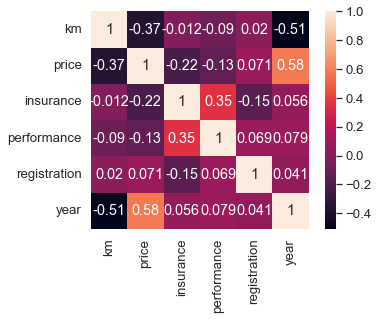

In [ ]:
sns.heatmap(data=car2.corr(), square=True, annot=True, cbar=True)
plt.show()

In [ ]:
car2.columns

Index(['name', 'type', 'km', 'price', 'insurance', 'performance',
       'registration', 'modelname', 'year'],
      dtype='object')

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeW

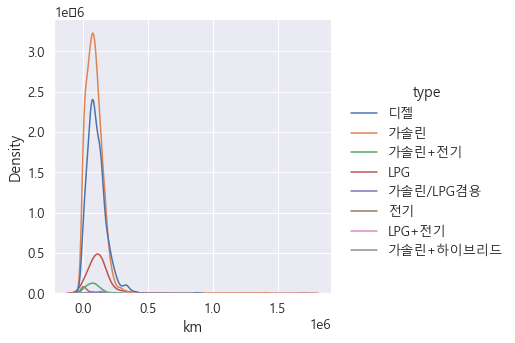

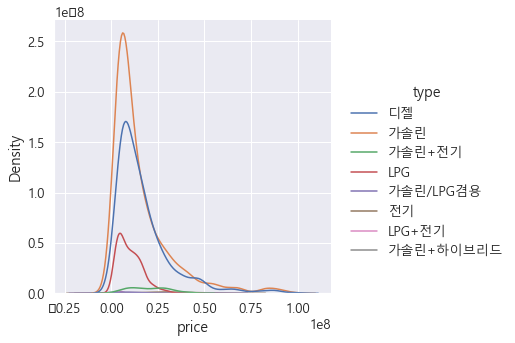

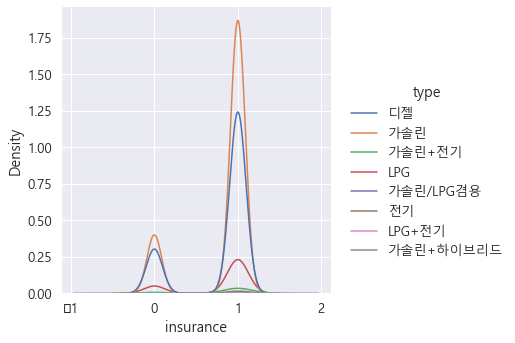

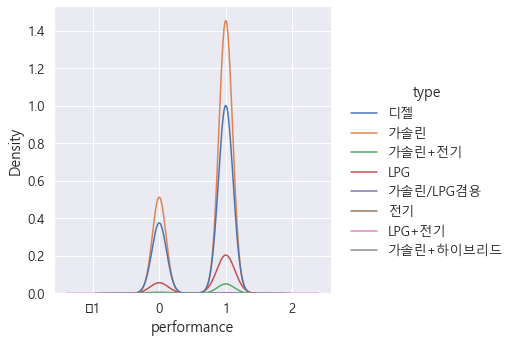

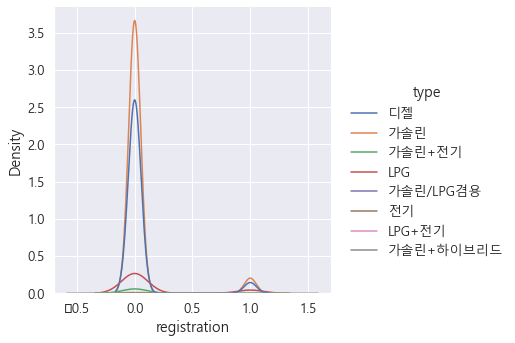

In [ ]:
for col in ['km', 'price', 'insurance', 'performance', 'registration']:
    sns.displot(x=col, hue='type', kind='kde', data=car2)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


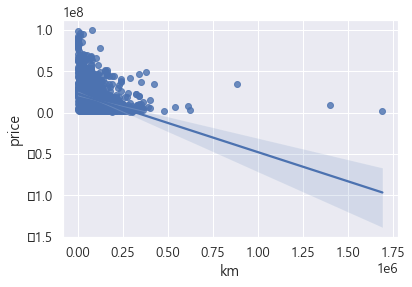

In [ ]:
sns.regplot(x='km', y='price', data=car2)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


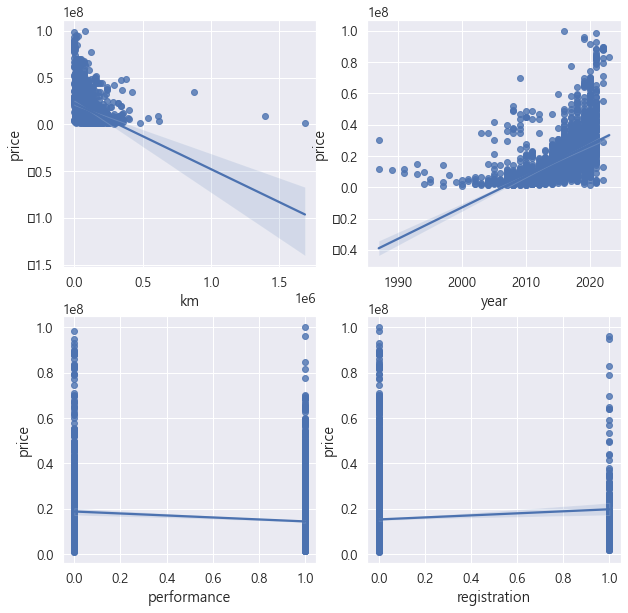

In [ ]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(['km', 'year', 'performance', 'registration']):
    ax1 = plt.subplot(2,2, idx+1)
    sns.regplot(x=col, y='price', data=car2, ax=ax1)
plt.show()

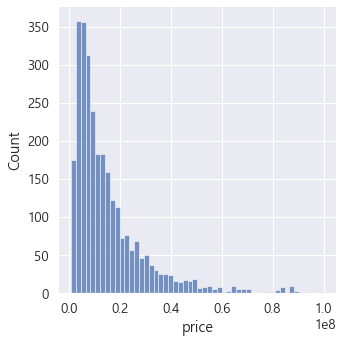

In [ ]:
sns.displot(x='price', kind='hist', data=car2)
plt.show()

In [ ]:
car2

,name,type,km,price,insurance,performance,registration,modelname,year
0,현대 포터2 초장축 더블캡 CRDi 최고급형,디젤,100000,6900000,1,1,0,포터,2010
1,현대 포터2 더블캡 4WD 장축 프리미엄,디젤,100000,10900000,1,1,0,포터,2013
2,현대 포터2 CRDi 슈퍼캡 초장축 골드 기본형,디젤,100000,4900000,1,1,0,포터,2009
3,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
4,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
...,...,...,...,...,...,...,...,...,...
2901,기아 쏘렌토 4세대 2.2 디젤 2WD 프레스티지,디젤,9000,35990000,1,1,0,쏘렌토,2020
2902,기아 스팅어 3.3 T-GDi AWD GT,가솔린,9000,47000000,1,0,0,스팅어,2020
2903,기아 디 올 뉴 스포티지 1.6 터보 2WD 노블레스,가솔린,9000,33500000,1,1,0,스포티지,2021
2904,기아 더 뉴 레이 1.0 시그니처,가솔린,9000,15990000,1,1,0,레이,2021


In [ ]:
car3 = car2[['km', 'year', 'insurance', 'performance', 'registration','price']]
car3

,km,year,insurance,performance,registration,price
0,100000,2010,1,1,0,6900000
1,100000,2013,1,1,0,10900000
2,100000,2009,1,1,0,4900000
3,100000,2012,1,1,0,7800000
4,100000,2012,1,1,0,7800000
...,...,...,...,...,...,...
2901,9000,2020,1,1,0,35990000
2902,9000,2020,1,0,0,47000000
2903,9000,2021,1,1,0,33500000
2904,9000,2021,1,1,0,15990000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

car3_scaled = car3.iloc[:, :]
scaler.fit(car3_scaled)
car3_scaled = scaler.transform(car3_scaled)
car3.loc[:, :] = car3_scaled[:, :]
car3.head()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,km,year,insurance,performance,registration,price
0,0.059168,0.638889,1.0,1.0,0.0,0.060551
1,0.059168,0.722222,1.0,1.0,0.0,0.100918
2,0.059168,0.611111,1.0,1.0,0.0,0.040367
3,0.059168,0.694444,1.0,1.0,0.0,0.069634
4,0.059168,0.694444,1.0,1.0,0.0,0.069634


In [ ]:
from sklearn.model_selection import train_test_split
x_data = car3.loc[:, ['km', 'year']]
y_data = car3.loc[:, 'price']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2614, 2) (2614,)
(291, 2) (291,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

print(np.round(lr.coef_, 1))
print(np.round(lr.intercept_, 1))

[-0.3  0.7]
-0.3


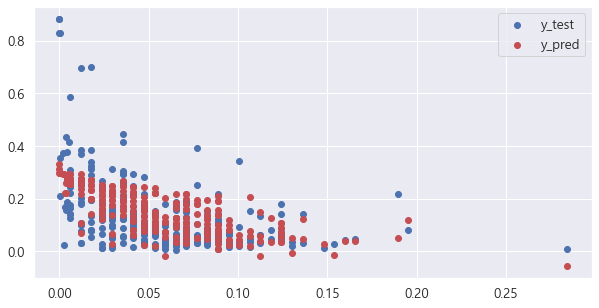

In [ ]:
y_test_pred = lr.predict(x_test)

plt.figure(figsize=(10,5))
plt.scatter(x_test['km'], y_test, label='y_test')
plt.scatter(x_test['km'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

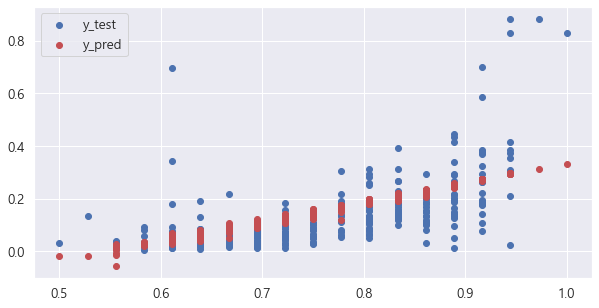

In [ ]:
y_test_pred = lr.predict(x_test)

plt.figure(figsize=(10,5))
plt.scatter(x_test['year'], y_test, label='y_test')
plt.scatter(x_test['year'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print('Train MSE:%.4f' %train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:%.4f' %test_mse)

Train MSE:0.0156
Test MSE:0.0122


In [ ]:
car2

,name,type,km,price,insurance,performance,registration,modelname,year
0,현대 포터2 초장축 더블캡 CRDi 최고급형,디젤,100000,6900000,1,1,0,포터,2010
1,현대 포터2 더블캡 4WD 장축 프리미엄,디젤,100000,10900000,1,1,0,포터,2013
2,현대 포터2 CRDi 슈퍼캡 초장축 골드 기본형,디젤,100000,4900000,1,1,0,포터,2009
3,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
4,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,디젤,100000,7800000,1,1,0,투싼,2012
...,...,...,...,...,...,...,...,...,...
2901,기아 쏘렌토 4세대 2.2 디젤 2WD 프레스티지,디젤,9000,35990000,1,1,0,쏘렌토,2020
2902,기아 스팅어 3.3 T-GDi AWD GT,가솔린,9000,47000000,1,0,0,스팅어,2020
2903,기아 디 올 뉴 스포티지 1.6 터보 2WD 노블레스,가솔린,9000,33500000,1,1,0,스포티지,2021
2904,기아 더 뉴 레이 1.0 시그니처,가솔린,9000,15990000,1,1,0,레이,2021


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in ['type', 'modelname']:
    encoder = LabelEncoder()
    car2[col]=encoder.fit_transform(car2[col])
car2.loc[:, ['type', 'modelname']].head()

,type,modelname
0,6,92
1,6,92
2,6,92
3,6,83
4,6,83


In [ ]:
car2[col]= encoder.inverse_transform(car2[col])

array(['포터', '포터', '포터', ..., '스포티지', '레이', '카니발'], dtype=object)

In [ ]:
car2.loc[:, ['type', 'modelname']].head()

,type,modelname
0,6,92
1,6,92
2,6,92
3,6,83
4,6,83


In [ ]:
car2

,name,type,km,price,insurance,performance,registration,modelname,year
0,현대 포터2 초장축 더블캡 CRDi 최고급형,6,100000,6900000,1,1,0,92,2010
1,현대 포터2 더블캡 4WD 장축 프리미엄,6,100000,10900000,1,1,0,92,2013
2,현대 포터2 CRDi 슈퍼캡 초장축 골드 기본형,6,100000,4900000,1,1,0,92,2009
3,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,6,100000,7800000,1,1,0,83,2012
4,현대 투싼ix 2.0 디젤 2WD X20 럭셔리,6,100000,7800000,1,1,0,83,2012
...,...,...,...,...,...,...,...,...,...
2901,기아 쏘렌토 4세대 2.2 디젤 2WD 프레스티지,6,9000,35990000,1,1,0,48,2020
2902,기아 스팅어 3.3 T-GDi AWD GT,2,9000,47000000,1,0,0,43,2020
2903,기아 디 올 뉴 스포티지 1.6 터보 2WD 노블레스,2,9000,33500000,1,1,0,45,2021
2904,기아 더 뉴 레이 1.0 시그니처,2,9000,15990000,1,1,0,20,2021


In [ ]:
car2 = car2[['type', 'km', 'year', 'insurance', 'performance', 'registration', 'modelname', 'price']]
car2

,type,km,year,insurance,performance,registration,modelname,price
0,6,100000,2010,1,1,0,92,6900000
1,6,100000,2013,1,1,0,92,10900000
2,6,100000,2009,1,1,0,92,4900000
3,6,100000,2012,1,1,0,83,7800000
4,6,100000,2012,1,1,0,83,7800000
...,...,...,...,...,...,...,...,...
2901,6,9000,2020,1,1,0,48,35990000
2902,2,9000,2020,1,0,0,43,47000000
2903,2,9000,2021,1,1,0,45,33500000
2904,2,9000,2021,1,1,0,20,15990000


In [ ]:
car4 = pd.read_csv('used_car5(이름 제거,열 순서 변경).csv', encoding='CP949')
car4

,modelname,type,insurance,performance,registration,km,year,price
0,포터,디젤,1,1,0,100000,2010,6900000
1,포터,디젤,1,1,0,100000,2013,10900000
2,포터,디젤,1,1,0,100000,2009,4900000
3,투싼,디젤,1,1,0,100000,2012,7800000
4,투싼,디젤,1,1,0,100000,2012,7800000
...,...,...,...,...,...,...,...,...
2900,쏘렌토,디젤,1,1,0,9000,2020,35990000
2901,스팅어,가솔린,1,0,0,9000,2020,47000000
2902,스포티지,가솔린,1,1,0,9000,2021,33500000
2903,레이,가솔린,1,1,0,9000,2021,15990000


In [ ]:
car4.corr()

,insurance,performance,registration,km,year,price
insurance,1.000000,0.346424,-0.152093,-0.012046,0.056285,-0.218502
performance,0.346424,1.000000,0.068920,-0.089902,0.079454,-0.127240
registration,-0.152093,0.068920,1.000000,0.020373,0.041453,0.070928
km,-0.012046,-0.089902,0.020373,1.000000,-0.509024,-0.367196
year,0.056285,0.079454,0.041453,-0.509024,1.000000,0.576451
price,-0.218502,-0.127240,0.070928,-0.367196,0.576451,1.000000


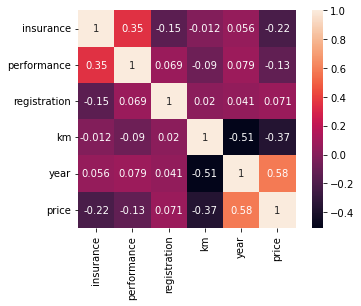

In [ ]:
sns.heatmap(data=car4.corr(), square=True, annot=True, cbar=True)
plt.show()

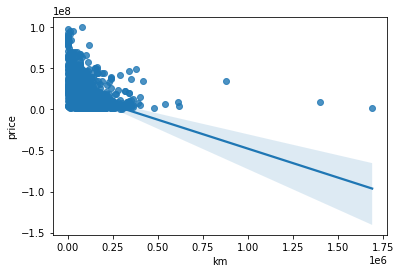

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='km', y='price', data=car4)
plt.show()

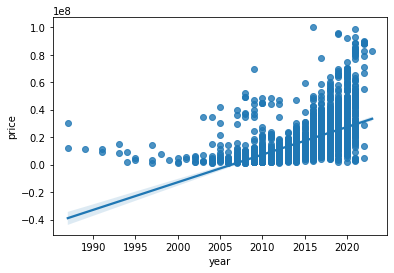

In [ ]:
sns.regplot(x='year', y='price', data=car4)
plt.show()